# Twitter Tweets Topic Modeling

### Background
This is based on Sentiment140 dataset with 1.6 million tweets(https://www.kaggle.com/kazanova/sentiment140). This project is a continuation of the Twitter Sentiment Analysis that my group and I have done as a final project for Applied Machine Learning course at Wright State University. (direct to Github page for Twitter Sentiment Analysis report)

### Goal
Using preprocessed tweets dataset, I want to know the most topics that people tweeted with the help of topic modeling using LDA (Latent Dirichlet Allocation).
* Generate 5 to 20 topics from the dataset
* Create a word cloud based on frequency of texts
* Create LDA Visualization

### Take Note
* Consider opening this notebook through Jupyter Notebook Viewer: https://nbviewer.jupyter.org/github/paulinearcita/Twitter-Tweets-Topic-Modeling/blob/master/Twitter%20Tweets%20Topic%20Modeling.ipynb#topic=0&lambda=1&term=
* Interpretation of result are in separate document named "Topic Modeling Explanation": https://github.com/paulinearcita/Twitter-Tweets-Topic-Modeling/blob/master/Topic%20Modeling%20Explanation.pdf

## Text Processing
For in depth text processing information, please visit this link: https://github.com/paulinearcita/Twitter-Tweets-Topic-Modeling/blob/master/Twitter%20Text%20Processing.ipynb

### Importing file

In [2]:
import pandas as pd
data = pd.read_csv('tweets-clean.csv', error_bad_lines=False);
data_text = data[['Tweets']]
data_text['Index'] = data_text.index
documents = data_text

print(len(documents))
print(documents[:5])

1046516
                                              Tweets  Index
0  awww thats a bummer  you shoulda got david car...      0
1  is upset that he cant update his facebook by t...      1
2   i dived many times for the ball managed to sa...      2
3    my whole body feels itchy and like its on fire       3
4   no its not behaving at all im mad why am i he...      4


In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arcit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Removing Stopwords, Stemming, and Lemmatization

In [4]:
from nltk import PorterStemmer

def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [5]:
doc_sample = documents[documents['Index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['i', 'am', 'so', 'sick', 'from', 'stress', 'gah', 'and', 'i', 'need', 'sleep', 'and', 'it', 'is', 'all', 'my', 'fault', '']


 tokenized and lemmatized document: 
['sick', 'stress', 'need', 'sleep', 'fault']


In [6]:
processed_docs = documents['Tweets'].map(preprocess)
processed_docs[:10]

0           [awww, that, bummer, shoulda, david, carr]
1    [upset, updat, facebook, text, result, school,...
2         [dive, time, ball, manag, save, rest, bound]
3                            [bodi, feel, itchi, like]
4                                              [behav]
5                                               [crew]
6                                               [need]
7                 [long, time, rain, fine, thank, how]
8                                        [nope, didnt]
9                                              [muera]
Name: Tweets, dtype: object

## Topic Modeling
Topic Modeling is a type of statistical modeling to discover abstract topics that are in a set of documents. It uses statistical language models to uncover hidden structure in a collection of texts. 
* The main goal of topic modeling is to be able to find what are the topics in a collection of documents.

I decided to use Latent Dirichlet Allocation (LDA) to find topics in the 1.6 million tweets(https://www.kaggle.com/kazanova/sentiment140).

### LDA using Gensim
Latent Dirichlet Allocation (LDA) is an example of topic modeling. It generates topics based on frequency of words from a set of documents.

Gensim is a package that I used to be able to generate LDA. 
To learn more about Gensim, here are some helpful and useful links:
* https://radimrehurek.com/gensim/models/ldamodel.html
* https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html
* https://radimrehurek.com/gensim/models/ldamulticore.html

In [7]:
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [8]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [9]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [10]:
# Per topic, it comes from different tweets depending on if the word appear on the tweet
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.032*"like" + 0.021*"littl" + 0.018*"think" + 0.018*"girl" + 0.015*"sweet" + 0.014*"quot" + 0.014*"cute" + 0.013*"funni" + 0.013*"guess" + 0.013*"amaz"
Topic: 1 
Words: 0.155*"http" + 0.064*"quot" + 0.038*"twitpiccom" + 0.030*"bitli" + 0.022*"say" + 0.016*"check" + 0.016*"tinyurlcom" + 0.014*"head" + 0.011*"person" + 0.011*"look"
Topic: 2 
Words: 0.116*"love" + 0.053*"know" + 0.034*"haha" + 0.029*"your" + 0.028*"that" + 0.025*"miss" + 0.022*"cool" + 0.020*"song" + 0.020*"thank" + 0.018*"dont"
Topic: 3 
Words: 0.057*"work" + 0.044*"go" + 0.033*"today" + 0.032*"tomorrow" + 0.030*"weekend" + 0.029*"week" + 0.029*"home" + 0.025*"time" + 0.020*"school" + 0.019*"long"
Topic: 4 
Words: 0.076*"watch" + 0.061*"want" + 0.041*"dont" + 0.030*"wish" + 0.023*"movi" + 0.020*"awesom" + 0.016*"know" + 0.015*"tonight" + 0.015*"like" + 0.011*"drink"
Topic: 5 
Words: 0.056*"need" + 0.024*"help" + 0.023*"talk" + 0.016*"read" + 0.016*"final" + 0.016*"book" + 0.015*"write" + 0.014*"let" + 0

## pyLDAvis
We are using pyLDAvis to make LDA visualization. This package will extract information from a fitted LDA topic model to generate an interactive web-based visualization. By doing this, it will help us interpret the topics that has been generated from the topic model that we have done so far.

To see the generated LDA visualization: https://nbviewer.jupyter.org/github/paulinearcita/Twitter-Tweets-Topic-Modeling/blob/master/Twitter%20Tweets%20Topic%20Modeling.ipynb#topic=0&lambda=1&term=

In [11]:
import pickle
import gensim
from gensim import corpora

# preprocessed data
processed_docs = documents['Tweets'].map(preprocess)

#initizalize dictionary of words
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# initialize the model that we will use
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# corpus 
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# pyLDAvis.gensim package is used
import pyLDAvis.gensim

# Generate and display LDA visualization
lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

### Word Cloud
Word cloud is a technique for visualizing text data. The size of each word indicates the word's frequency and importance in the dataset. The bigger the word in the wordcloud, the higher number of frequency and importance. 

In [12]:
# installing libraries that will be needed for wordcloud

!pip install matplotlib
!pip install wordcloud

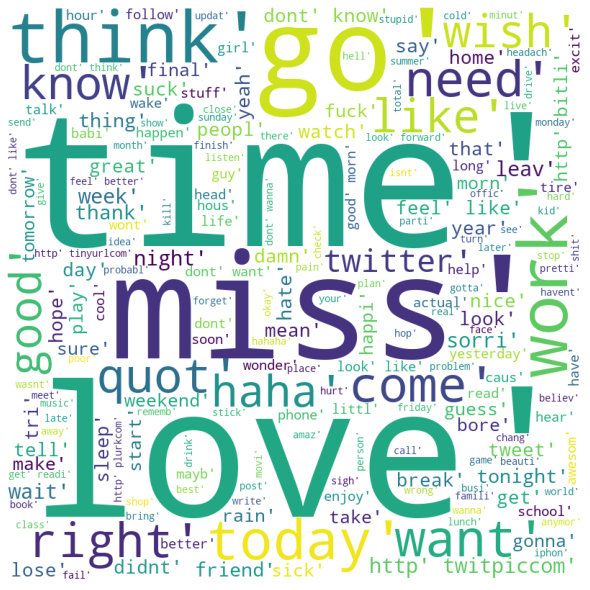

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

text = ''

# convert every word in the list into string
for val in processed_docs.values:
    val = str(val)
    text += val
    
# using wordcloud package and generate texts into word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image customize the design                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [28]:
tweet_love1 = documents[documents['Index'] == 18].values[0][0]
tweet_love2 = documents[documents['Index'] == 33].values[0][0]

print('Tweet that has "love": \n' + tweet_love1)
print(tweet_love2)

tweet_time1 = documents[documents['Index'] == 45].values[0][0]
tweet_time2 = documents[documents['Index'] == 104].values[0][0]
print('\nTweet that has "time": \n' + tweet_time1)
print(tweet_time2)

tweet_miss1 = documents[documents['Index'] == 119].values[0][0]
tweet_miss2 = documents[documents['Index'] == 136].values[0][0]
print('\nTweet that has "time": \n' + tweet_miss1)
print(tweet_miss2)

Tweet that has "love": 
 ahh ive always wanted to see rent  love the soundtrack
 awe i love you too 1 am here  i miss you

Tweet that has "time": 
 yay im happy for you with your job but that also means less time for me and you 
 remember my bum leg strikes back this time its serious 

Tweet that has "time": 
 aaw i miss ya all too im leaving to bh tomorrow &quotmorning&quot i think aww i wanna go to the beach w u girls 
i miss kenny powers 


## Future Work
* Generate a graph and table of perplexity vs. number of topics
* Create and analyze Coherence score vs. number of topics
* Plot cluster documents that share similar topics
* Get top 10 to 15 keywords in each topic